In [2]:
# Step 1: Install Required Libraries
!pip install opencv-python-headless
!pip install numpy
!pip install matplotlib

# Step 2: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load Pre-trained Model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Step 4: Define the Function to Detect Facial Features
def detect_features(image_path):
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at '{image_path}'. Please check the file path.")
        return None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    return img, faces

# Step 5: Define the Function to Suggest Colors
def suggest_colors(face_features):
    # Example logic to map features to colors
    colors = {
        'fair': ['#FFDDC1', '#FFE4E1', '#FFDAB9'],
        'medium': ['#FF8C69', '#FFA07A', '#CD853F'],
        'olive': ['#556B2F', '#8B4513', '#D2691E'],
        'dark': ['#8B0000', '#4B0082', '#483D8B']
    }

    # Dummy logic to choose a color palette based on detected face features
    if face_features is not None and len(face_features) > 0:
        if face_features[0][2] < 150:  # Width of the detected face
            return colors['fair']
        elif face_features[0][2] < 200:
            return colors['medium']
        else:
            return colors['dark']
    return colors['olive']

# Step 6: Create a Function to Display Image and Suggested Colors
def display_results(image_path):
    img, faces = detect_features(image_path)

    # Handle the case where image loading failed
    if img is None:
        return

    color_palette = suggest_colors(faces)

    # Display the image with detected features
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display the suggested color palette
    print("Suggested Color Palette:")
    for color in color_palette:
        plt.figure(figsize=(2, 2))
        plt.imshow([[color]])
        plt.axis('off')
        plt.show()

# Step 7: Use the Uploaded Image
# Make sure 'uploaded_image.jpg' is in

In [4]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00


In [6]:
import ipywidgets as widgets
from IPython.display import display # Removed extra space before "from"

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

FileUpload(value={}, description='Upload')

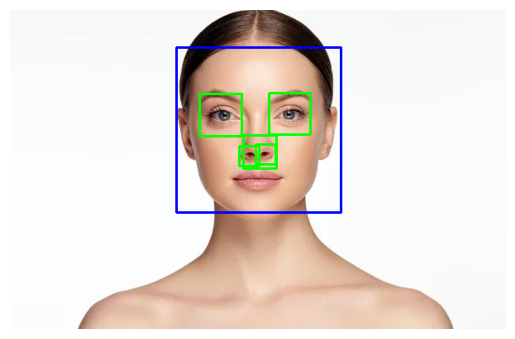

Suggested Color Palette:


TypeError: Image data of dtype <U7 cannot be converted to float

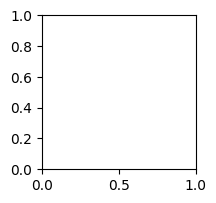

In [7]:
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing functions: detect_features, suggest_colors, display_results) ...

# Create upload widget
uploader = widgets.FileUpload()
display(uploader)

# Function to handle uploaded image
def handle_upload(change):
    # Get uploaded image data
    uploaded_filename = next(iter(change['new']))
    uploaded_file = change['new'][uploaded_filename]
    image_data = uploaded_file['content']

    # Save the uploaded image temporarily (optional, but might be helpful)
    with open('temp_uploaded_image.jpg', 'wb') as f:
        f.write(image_data)

    # Process the image
    display_results('temp_uploaded_image.jpg')

# Observe changes in the upload widget
uploader.observe(handle_upload, names='value')

In [8]:
# Step 6: Create a Function to Display Image and Suggested Colors
def display_results(image_path):
    img, faces = detect_features(image_path)

    # Handle the case where image loading failed
    if img is None:
        return

    color_palette = suggest_colors(faces)

    # Display the image with detected features
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display the suggested color palette
    print("Suggested Color Palette:")
    for color_hex in color_palette:
        # Convert hex color to RGB values
        color_rgb = tuple(int(color_hex[i:i+2], 16) for i in (1, 3, 5))

        # Normalize RGB values to be between 0 and 1
        color_rgb_normalized = [c / 255.0 for c in color_rgb]

        plt.figure(figsize=(2, 2))
        # Display the color using a numerical representation
        plt.imshow([[color_rgb_normalized]])
        plt.axis('off')
        plt.show()

FileUpload(value={}, description='Upload')

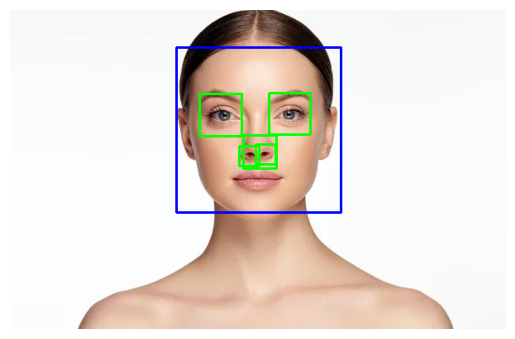

Suggested Color Palette:


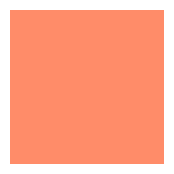

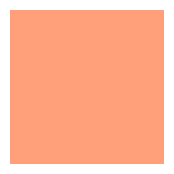

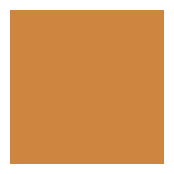

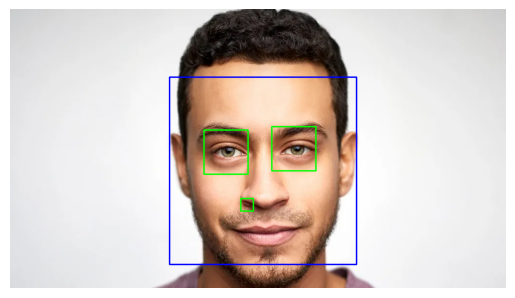

Suggested Color Palette:


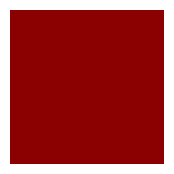

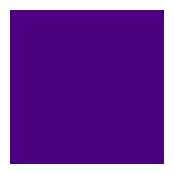

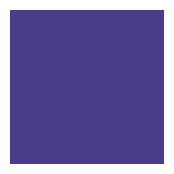

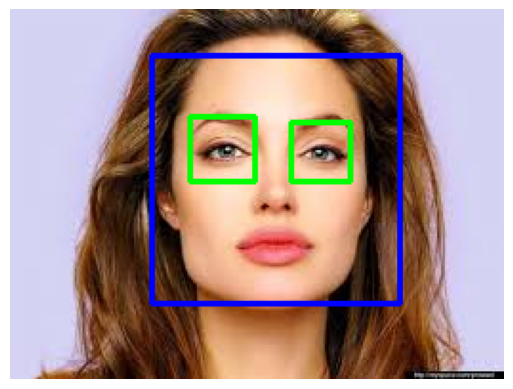

Suggested Color Palette:


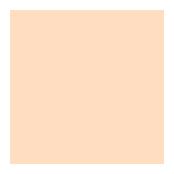

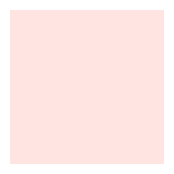

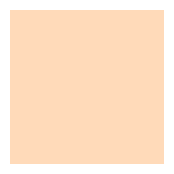

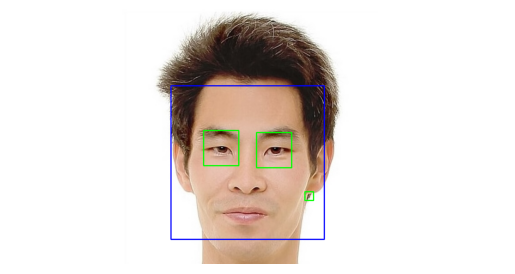

Suggested Color Palette:


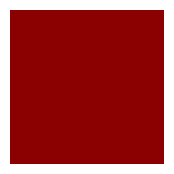

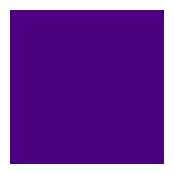

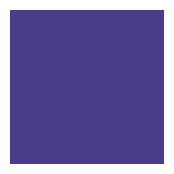

Error: Could not load image at 'temp_uploaded_image.jpg'. Please check the file path.


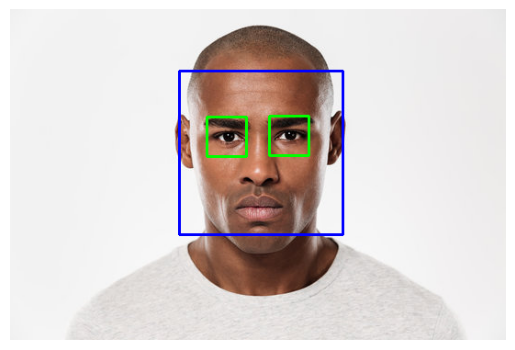

Suggested Color Palette:


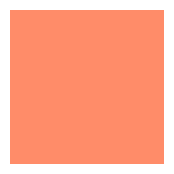

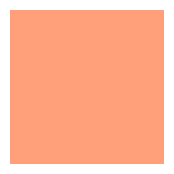

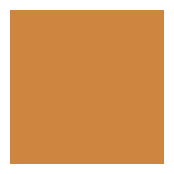

In [9]:
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing functions: detect_features, suggest_colors, display_results) ...

# Create upload widget
uploader = widgets.FileUpload()
display(uploader)

# Function to handle uploaded image
def handle_upload(change):
    # Get uploaded image data
    uploaded_filename = next(iter(change['new']))
    uploaded_file = change['new'][uploaded_filename]
    image_data = uploaded_file['content']

    # Save the uploaded image temporarily (optional, but might be helpful)
    with open('temp_uploaded_image.jpg', 'wb') as f:
        f.write(image_data)

    # Process the image
    display_results('temp_uploaded_image.jpg')

# Observe changes in the upload widget
uploader.observe(handle_upload, names='value')